# 0. Setup and Data Loading

In [ ]:
# if you have errors run the command pip install -r requirements.txt
import os
import json
import nltk 
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import math
import numpy as np
import collections
from numpy import linalg as la
import string
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [22]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/margaritacrespo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/margaritacrespo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/margaritacrespo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/margaritacrespo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/margaritacrespo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
docs_path = os.path.join('..', '..', 'data', 'fashion_products_dataset.json')

with open(docs_path, 'r') as f:
    products = json.load(f)

print("Total number of products in the corpus: {}".format(len(products)))

Total number of products in the corpus: 28080


In [24]:
#Display the first 5 products
display(products[:5])

#Display the keys of the first product to see available information
if products:
    print("\nKeys available for each product:")
    print(products[0].keys())

[{'_id': 'fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a',
  'actual_price': '2,999',
  'average_rating': '3.9',
  'brand': 'York',
  'category': 'Clothing and Accessories',
  'crawled_at': 1612987911000,
  'description': 'Yorker trackpants made from 100% rich combed cotton giving it a rich look.Designed for Comfort,Skin friendly fabric,itch-free waistband & great for all year round use Proudly made in India',
  'discount': '69% off',
  'images': ['https://rukminim1.flixcart.com/image/128/128/jr3t5e80/track-pant/z/y/n/m-1005combo2-yorker-original-imafczg3xfh5qqd4.jpeg?q=70',
   'https://rukminim1.flixcart.com/image/128/128/jr58l8w0/track-pant/w/d/a/l-1005combo8-yorker-original-imafczg3pgtxgraq.jpeg?q=70'],
  'out_of_stock': False,
  'pid': 'TKPFCZ9EA7H5FYZH',
  'product_details': [{'Style Code': '1005COMBO2'},
   {'Closure': 'Elastic'},
   {'Pockets': 'Side Pockets'},
   {'Fabric': 'Cotton Blend'},
   {'Pattern': 'Solid'},
   {'Color': 'Multicolor'}],
  'seller': 'Shyam Enterprises',
  'selling_


Keys available for each product:
dict_keys(['_id', 'actual_price', 'average_rating', 'brand', 'category', 'crawled_at', 'description', 'discount', 'images', 'out_of_stock', 'pid', 'product_details', 'seller', 'selling_price', 'sub_category', 'title', 'url'])


In [25]:
# display list of selling_price values for each product (products is a list of dicts)
display([p.get('discount') for p in products])

['69% off',
 '66% off',
 '68% off',
 '69% off',
 '68% off',
 '74% off',
 '68% off',
 '63% off',
 '67% off',
 '64% off',
 '76% off',
 '49% off',
 '49% off',
 '61% off',
 '61% off',
 '48% off',
 '61% off',
 '61% off',
 '61% off',
 '69% off',
 '70% off',
 '67% off',
 '70% off',
 '76% off',
 '71% off',
 '70% off',
 '71% off',
 '76% off',
 '67% off',
 '67% off',
 '66% off',
 '66% off',
 '68% off',
 '64% off',
 '29% off',
 '79% off',
 '79% off',
 '73% off',
 '80% off',
 '79% off',
 '79% off',
 '81% off',
 '79% off',
 '80% off',
 '79% off',
 '72% off',
 '80% off',
 '79% off',
 '79% off',
 '81% off',
 '79% off',
 '79% off',
 '77% off',
 '80% off',
 '79% off',
 '81% off',
 '79% off',
 '79% off',
 '67% off',
 '79% off',
 '71% off',
 '79% off',
 '79% off',
 '79% off',
 '77% off',
 '77% off',
 '76% off',
 '79% off',
 '77% off',
 '77% off',
 '77% off',
 '79% off',
 '79% off',
 '77% off',
 '79% off',
 '79% off',
 '79% off',
 '77% off',
 '77% off',
 '77% off',
 '81% off',
 '79% off',
 '82% off',
 '81

# 1. Part 1: Data Preparation

## 1.1. Preprocessing Functions

In [26]:
def setup_preprocessing_tools():
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    stop_words.update(['made', 'wear', 'buy', 'product', 'latest'])
    stop_words.discard('no')
    stop_words.discard('not')
    return stemmer, lemmatizer, stop_words

In [27]:
def preprocess_text(text, lemmatizer, stemmer, stop_words):
    """
    Preprocess natural text:
    - lowercase
    - remove punctuation/numbers
    - tokenize
    - remove stopwords and non-alphabetic tokens
    - stem + lemmatize
    """
    if not isinstance(text, str):
        return []
    
    text = text.replace('-', ' ')

    # lowercase
    text = text.lower()

    # remove punctuation and digits
    text = re.sub(f"[{re.escape(string.punctuation)}0-9]", " ", text)

    # tokenize
    tokens = word_tokenize(text)

    # filter tokens (stopwords, non-alpha, short tokens)
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]

    # stem + lemmatize
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    tokens = [stemmer.stem(w) for w in tokens]

    # Optional: normalize color/material terms (bonus)
    color_map = {'navy': 'blue', 'grey': 'gray', 'fucsia': 'pink', 'burgundy': 'red', 'violet': 'purple', 'beige': 'brown', 'magenta': 'pink', 'indigo': 'blue', 
                 'charcoal': 'gray', 'crimson': 'red', 'teal': 'green', 'lavender': 'purple', 'mustard': 'yellow', 'turquoise': 'blue', 'peach': 'orange'}
    
    #!!!!!!!!!!!!!!!!!!!!!!!!!hink more materials to add here
    material_map = {'polyester': 'synthetic', 'denim': 'cotton'}
    tokens = [color_map.get(w, material_map.get(w, w)) for w in tokens]

    return tokens


In [28]:
def clean_numeric(value, value_type='float'):
  """Convert strings to numeric values"""
  if not isinstance(value, str):
      return None

  #Eliminate non-numerical characters (except dots)
  cleaned_value = re.sub(r'[^0-9.]', '', value)
  if not cleaned_value:
      return None

  try:
      if value_type == 'int':
          return int(float(cleaned_value))
      else:
          return float(cleaned_value)
  except (ValueError, TypeError):
      return None

In [29]:
#Apply some preprocessing to categorical fields such as "brand". Here we only use conversion to lowercase and join everything into a single token, since it's already clean for the most part
def clean_categorical(value):
    """Few processing for categorical fields"""
    if not isinstance(value, str):
        return None

    #Just convert to lowercase and join everything into a single token separating words by "_"
    return value.lower().strip().replace(' ', '_')

## 1.2. Build the  Clean Corpus

In [30]:
stemmer, lemmatizer, stop_words = setup_preprocessing_tools()

processed_corpus = []
for prod in products:
    processed_prod={
        'pid': prod.get('pid'),
        'url': prod.get('url'),
    }

    # text fields

    title_text = prod.get('title', '') or ''
    description_text = prod.get('description', '') or ''
    full_text = title_text + " " + description_text

    processed_prod['processed_text'] = preprocess_text(full_text, lemmatizer, stemmer, stop_words)

    #store raw title/description to include in final output
    processed_prod['title'] = prod.get('title')
    processed_prod['description'] = prod.get('description')

    #Processing of categorical fields
    processed_prod['brand_facet'] = clean_categorical(prod.get('brand'))
    processed_prod['category_facet'] = clean_categorical(prod.get('category'))
    processed_prod['subcategory_facet'] = clean_categorical(prod.get('sub_category'))
    processed_prod['seller_facet'] = clean_categorical(prod.get('seller'))

    #Processing of numerical fields (passed to float)
    processed_prod['discount'] = clean_numeric(prod.get('discount'), 'float')
    processed_prod['selling_price'] = clean_numeric(prod.get('selling_price'), 'float')
    processed_prod['actual_price'] = clean_numeric(prod.get('actual_price'), 'float')
    processed_prod['average_rating'] = clean_numeric(prod.get('average_rating'), 'float')
    
    #Process product_details separatelyc
    #Extract the different values and process them as natural text alltogether
    details_text = ''
    if isinstance(prod.get('product_details'), list):
        details_values = [list(item.values())[0] for item in prod.get('product_details', []) if item and isinstance(list(item.values())[0], str)]
        details_text = ' '.join(details_values)
    processed_prod['attributes'] = preprocess_text(details_text, lemmatizer, stemmer, stop_words)

    processed_corpus.append(processed_prod)
    

## 1.3. Display of cleaned data

In [31]:
#Example of product preprocessed
display(processed_corpus[0])

{'pid': 'TKPFCZ9EA7H5FYZH',
 'url': 'https://www.flipkart.com/yorker-solid-men-multicolor-track-pants/p/itmd2c76aadce459?pid=TKPFCZ9EA7H5FYZH&lid=LSTTKPFCZ9EA7H5FYZHVYXWP0&marketplace=FLIPKART&srno=b_1_1&otracker=browse&fm=organic&iid=177a46eb-d053-4732-b3de-fcad6ff59cbd.TKPFCZ9EA7H5FYZH.SEARCH&ssid=utkd4t3gb40000001612415717799',
 'processed_text': ['solid',
  'woman',
  'multicolor',
  'track',
  'pant',
  'yorker',
  'trackpant',
  'rich',
  'comb',
  'cotton',
  'give',
  'rich',
  'look',
  'design',
  'comfort',
  'skin',
  'friendli',
  'fabric',
  'itch',
  'free',
  'waistband',
  'great',
  'year',
  'round',
  'use',
  'proudli',
  'india'],
 'title': 'Solid Women Multicolor Track Pants',
 'description': 'Yorker trackpants made from 100% rich combed cotton giving it a rich look.Designed for Comfort,Skin friendly fabric,itch-free waistband & great for all year round use Proudly made in India',
 'brand_facet': 'york',
 'category_facet': 'clothing_and_accessories',
 'subcategor

# 2. Part 2: Exploratory Data Analysis

## 2.1. Look at the Data Structure

In [32]:
# Build a Dataframe using pandas library 
df = pd.DataFrame(processed_corpus)
df.info()
print('Shape of the dataframe:', df.shape)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pid                28080 non-null  object 
 1   url                28080 non-null  object 
 2   processed_text     28080 non-null  object 
 3   title              28080 non-null  object 
 4   description        28080 non-null  object 
 5   brand_facet        28080 non-null  object 
 6   category_facet     28080 non-null  object 
 7   subcategory_facet  28080 non-null  object 
 8   seller_facet       28080 non-null  object 
 9   discount           27225 non-null  float64
 10  selling_price      28078 non-null  float64
 11  actual_price       27303 non-null  float64
 12  average_rating     25819 non-null  float64
 13  attributes         28080 non-null  object 
dtypes: float64(4), object(10)
memory usage: 3.0+ MB
Shape of the dataframe: (28080, 14)


,discount,selling_price,actual_price,average_rating
count,27225.000000,28078.000000,27303.000000,25819.000000
mean,50.256896,705.635088,1455.528110,3.627724
std,16.887287,549.681489,939.977456,0.663429
min,1.000000,99.000000,150.000000,1.000000
25%,40.000000,390.000000,849.000000,3.200000
50%,53.000000,545.000000,1199.000000,3.800000
75%,63.000000,820.000000,1799.000000,4.100000
max,87.000000,7999.000000,12999.000000,5.000000


## 2.2. Overview of Most Important Products, Brands and Sellers

We have found 28080 different pids. 

We have found 5953 different titles/products.
title
Slides                                      544
Printed Men Round Neck Black T-Shirt        418
Printed Women Round Neck Black T-Shirt      396
Printed Women Round Neck White T-Shirt      349
Rayon Printed Shirt Fabric  (Unstitched)    343
Name: count, dtype: int64 

We have found 322 different brands.
brand_facet
                2009
ecko_unl         951
free_authori     860
arbo             806
reeb             802
Name: count, dtype: int64 



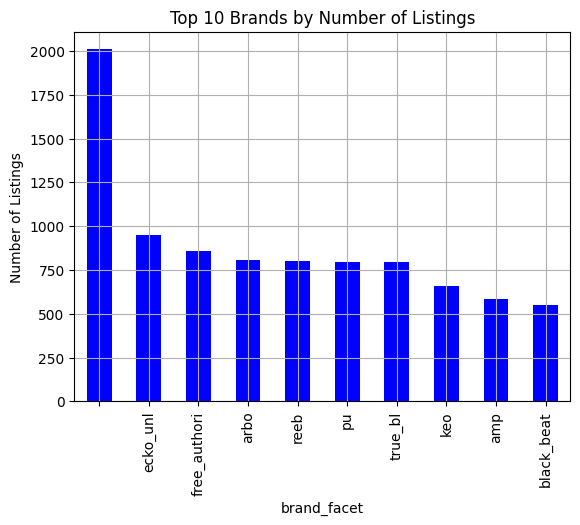

We have found 535 different sellers.
seller_facet
                         1643
retailnet                1411
sandsmarketing            887
bioworldmerchandising     842
arbor                     783
Name: count, dtype: int64 



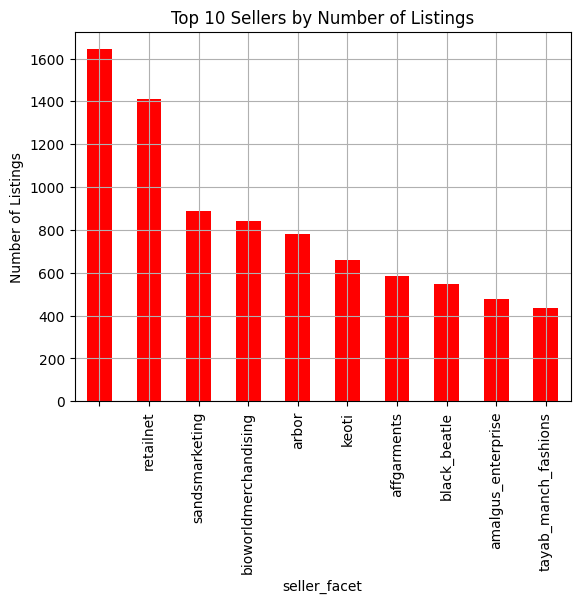

In [33]:
# Look for pid repetitions
print('We have found', df['pid'].nunique(), 'different pids. \n')

# Look for title repetitions
print('We have found', df['title'].nunique(), 'different titles/products.')
title_counts = df['title'].value_counts()
print(title_counts.head(), '\n')

# Look for brand repetitions
print('We have found', df['brand_facet'].nunique(), 'different brands.')
brand_counts = df['brand_facet'].value_counts()
print(brand_counts.head(), '\n')

brand_counts.head(10).plot(kind='bar', color='blue')
plt.title("Top 10 Brands by Number of Listings")
plt.ylabel("Number of Listings")
plt.grid()
plt.show()


# Look for seller repetitions
print('We have found', df['seller_facet'].nunique(), 'different sellers.')
brand_counts = df['seller_facet'].value_counts()
print(brand_counts.head(), '\n')

seller_counts = df['seller_facet'].value_counts()
seller_counts.head(10).plot(kind='bar', color='red')
plt.title("Top 10 Sellers by Number of Listings")
plt.ylabel("Number of Listings")
plt.grid()
plt.show()

## 2.3. Analysis of Numerical Columns

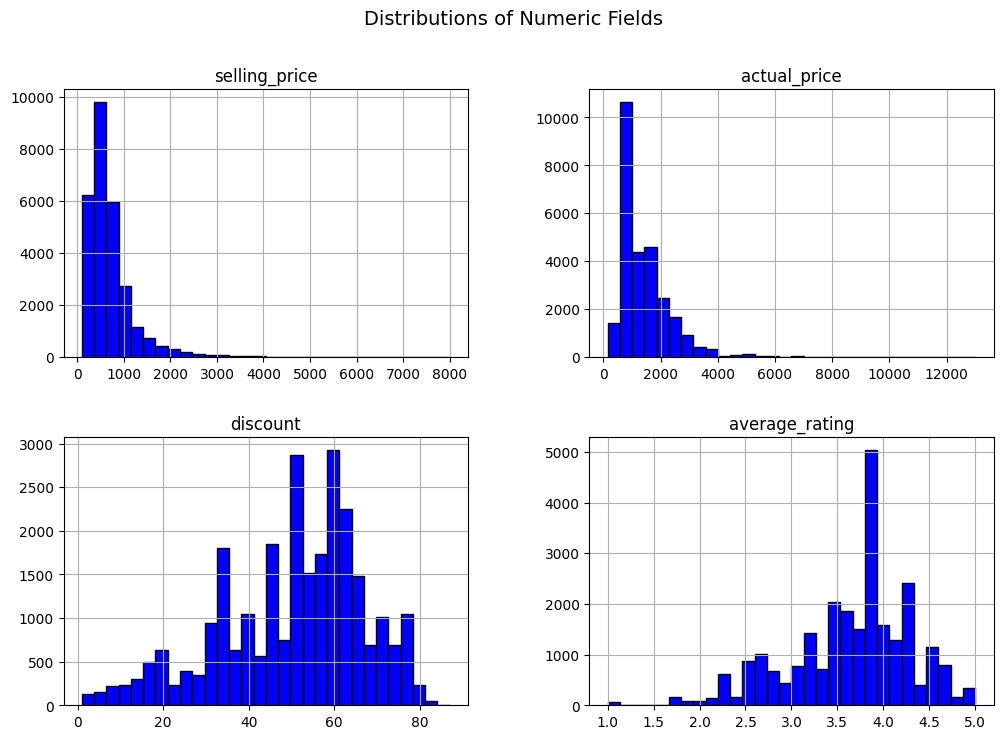

In [34]:
# Look how is data distributed overall
numeric_cols = ['selling_price', 'actual_price', 'discount', 'average_rating']
df[numeric_cols].hist(bins=30, figsize=(12, 8), color='blue', edgecolor='black')
plt.suptitle("Distributions of Numeric Fields", fontsize=14)
plt.show()

Average discount ratio: 50.47468543622523 %


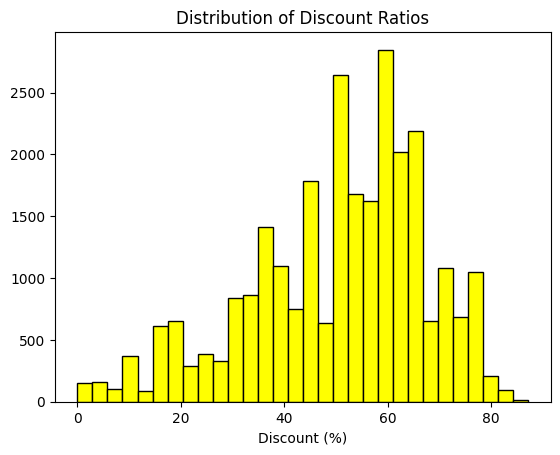

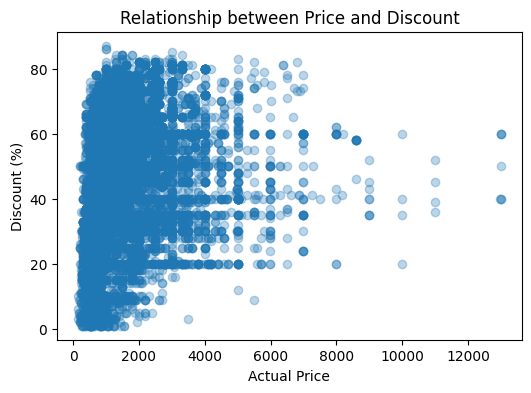

In [35]:
discount_ratio = (df['actual_price'] - df['selling_price']) / df['actual_price']
discount_per = discount_ratio*100
print("Average discount ratio:", discount_ratio.mean()*100, "%")


#let's visualize the discount ratio
plt.hist(discount_per, bins=30, color='yellow', edgecolor='black')
plt.title("Distribution of Discount Ratios")
plt.xlabel("Discount (%)")
plt.show()


plt.figure(figsize=(6,4))
plt.scatter(df['actual_price'], df['discount'], alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Discount (%)")
plt.title("Relationship between Price and Discount")
plt.show()

## 2.5. Text Statistics

The row with most words has 536 words


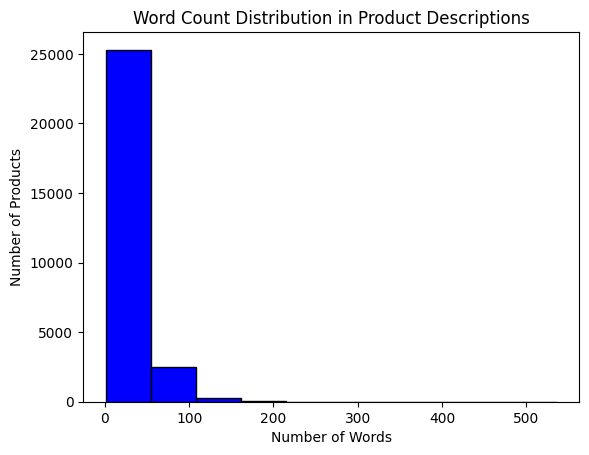

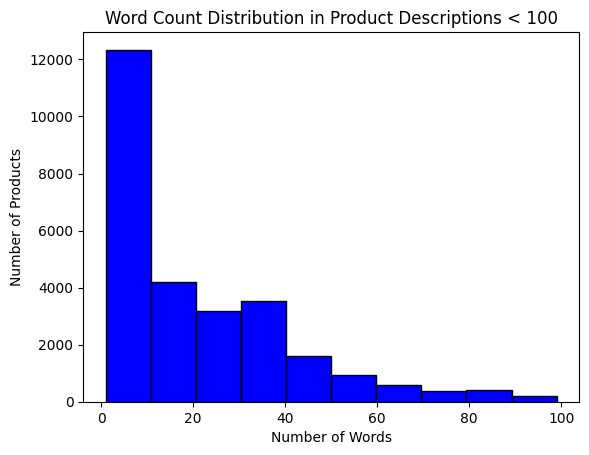

In [36]:
# Word count per product
word_count = df['processed_text'].apply(len)
print('The row with most words has', word_count.max(), 'words')

plt.hist(word_count, bins=10, color='blue', edgecolor='black')
plt.title("Word Count Distribution in Product Descriptions")
plt.xlabel("Number of Words")
plt.ylabel("Number of Products")
plt.show()

plt.hist(word_count[word_count < 100], bins=10, color='blue', edgecolor='black')
plt.title("Word Count Distribution in Product Descriptions < 100")
plt.xlabel("Number of Words")
plt.ylabel("Number of Products")
plt.show()


In [37]:
# Vocabulary size
vocab = set()
for words_list in df['processed_text']:
    for word in words_list:
        vocab.add(word)

print("Vocabulary size:", len(vocab))
print("Average words per product:", word_count.mean())

Vocabulary size: 4632
Average words per product: 23.97991452991453


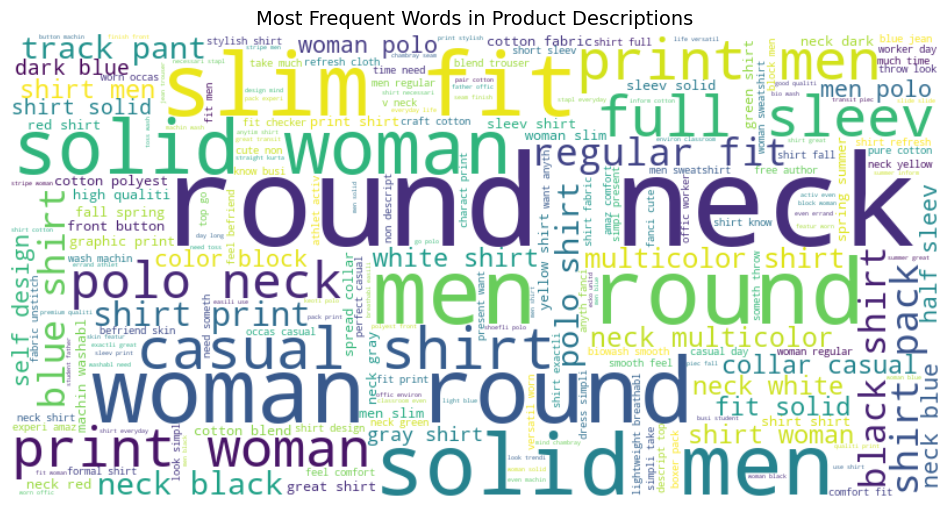

In [38]:
# Most Frequent Words
all_words = ""
for words_list in df['processed_text']:
    # Join that list into a single string separated by spaces
    product_text = " ".join(words_list)

    # Add this string to the global text
    all_words += " " + product_text

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='viridis'
).generate(all_words)

plt.figure(figsize=(12, 7))        
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')                
plt.title("Most Frequent Words in Product Descriptions", fontsize=14)
plt.show()

EJEMPLOS QUE DA EL PROFE:
- word counting distribution --> DONE
- average sentence length --> NOT DONE y no me parece interesante 
- vocabulary size --> DONE
- ranking of products based on rating, price, discount 
- top sellers and brands --> DONE
- out_of_stock distribution **CAN'T BE DONE WITH THE CURRENT PREPROCESSING**
- word clouds for the most frequent words --> DONE
- entity recognition.